In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/APPLICATION FOR DATA SCIENCE/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 2480 files belonging to 5 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Common_rust_']


# Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/APPLICATION/trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

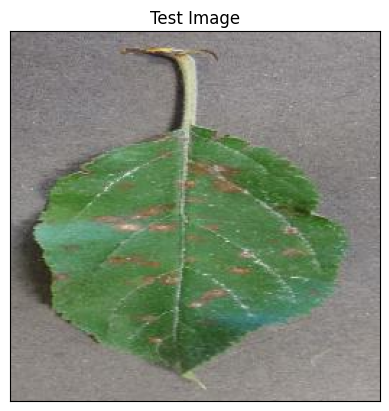

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/APPLICATION FOR DATA SCIENCE/test/test/AppleCedarRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


In [ ]:
print(predictions)

[[4.2352830e-24 8.3406086e-29 1.0000000e+00 4.7591206e-29 1.4807526e-13]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


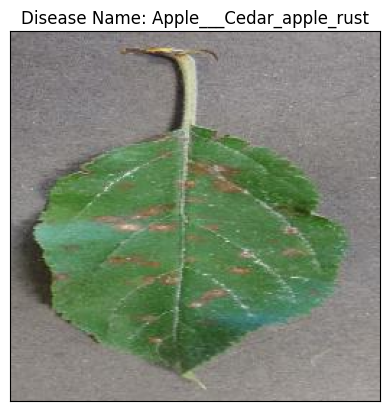

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()